In [25]:

import pandas as pd
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib


In [26]:

# Cargar modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Función para preprocesar texto
def preprocesar(texto):
    doc = nlp(texto.lower())
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])


In [27]:

# Leer archivo CSV y aplicar preprocesamiento
df = pd.read_csv('./activos_pi_2.csv', encoding='latin1')
df["descripcion"] = df["descripcion"].apply(preprocesar)

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(df["descripcion"], df["categoria"], test_size=0.2, random_state=42)

# Vectorización TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


=== Reporte de Clasificación - Random Forest ===
                  precision    recall  f1-score   support

Derecho de autor       0.98      1.00      0.99        42
           Marca       1.00      1.00      1.00        45
         Patente       1.00      0.97      0.99        37

        accuracy                           0.99       124
       macro avg       0.99      0.99      0.99       124
    weighted avg       0.99      0.99      0.99       124



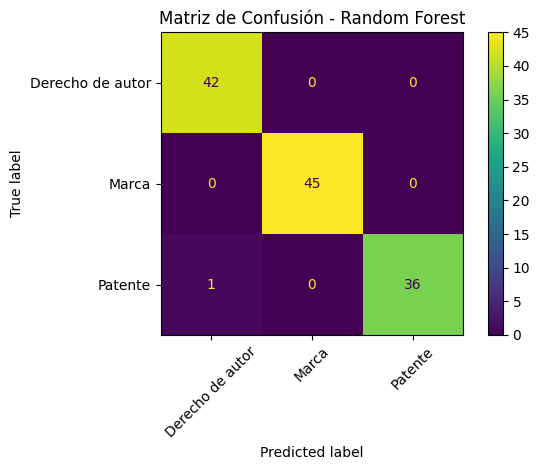

['vectorizer_tfidf.pkl']

In [28]:

# Modelo Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_tfidf, y_train)

# Predicción y métricas
y_pred = clf.predict(X_test_tfidf)
print("=== Reporte de Clasificación - Random Forest ===")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(xticks_rotation=45)
plt.title("Matriz de Confusión - Random Forest")
plt.tight_layout()
plt.show()

# Guardar modelo y vectorizador
joblib.dump(clf, "modelo_random_forest.pkl")
joblib.dump(vectorizer, "vectorizer_tfidf.pkl")


In [29]:

# Prueba con nueva descripción
nueva_descripcion = ["un dispositivo mejorado para la comunicación"]
descripcion_proc = [preprocesar(nueva_descripcion[0])]
nueva_tfidf = vectorizer.transform(descripcion_proc)

prediccion = clf.predict(nueva_tfidf)[0]
print("Predicción con Random Forest:", prediccion)


Predicción con Random Forest: Patente


In [30]:
# Prueba con nueva descripción
nueva_descripcion = ["logotipo para mi empresa de tecnología"]
descripcion_proc = [preprocesar(nueva_descripcion[0])]
nueva_tfidf = vectorizer.transform(descripcion_proc)

prediccion = clf.predict(nueva_tfidf)[0]
print("Predicción con Random Forest:", prediccion)

Predicción con Random Forest: Marca


In [31]:
# Prueba con nueva descripción
nueva_descripcion = ["un software de gestión de proyectos"]
descripcion_proc = [preprocesar(nueva_descripcion[0])]
nueva_tfidf = vectorizer.transform(descripcion_proc)

prediccion = clf.predict(nueva_tfidf)[0]
print("Predicción con Random Forest:", prediccion)

Predicción con Random Forest: Derecho de autor


In [32]:
# Prueba con nueva descripción
nueva_descripcion = ["patente"]
descripcion_proc = [preprocesar(nueva_descripcion[0])]
nueva_tfidf = vectorizer.transform(descripcion_proc)

prediccion = clf.predict(nueva_tfidf)[0]
print("Predicción con Random Forest:", prediccion)

Predicción con Random Forest: Patente
